In [1]:
#pip install category-encoders

# We will use this lib to make hash encoding later in the EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats.mstats import winsorize

import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# EDA (Exploratory Data Analysis)

[KAGGLE code](https://www.kaggle.com/code/harshini564/life-expectancy-cleaning-eda-feature-engineering/notebook)

**Quick reminder of the steps:**

1. IMPORTING THE DATA
2. OBSERVING THE DATA
3. UNI-VARIATE ANALYSIS
4. BI-VARIATE ANALYSIS
5. MULTIVARIATE ANALYSIS
6. CLEANING DATA
7. FEATURE ENGINEERING

## Importing the data

In [3]:
df = pd.read_csv("LifeExp.csv")
df.dataframeName = 'LifeExp.csv'

## Observe the data

In [4]:
lines, columns = df.shape
print(f'The `{df.dataframeName}` dataset has {lines} rows and {columns} columns')

The `LifeExp.csv` dataset has 2938 rows and 22 columns


In [5]:
# Some columns have a space at the beginning, so we need to remove it
df.columns = df.columns.str.strip()

# Rename the columns to avoid capital letters, spaces, and double spaces
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('__', '_').str.replace('/', '-')

In [6]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv-aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   country                          object 
 1   year                             int64  
 2   status                           object 
 3   life_expectancy                  float64
 4   adult_mortality                  float64
 5   infant_deaths                    int64  
 6   alcohol                          float64
 7   percentage_expenditure           float64
 8   hepatitis_b                      float64
 9   measles                          int64  
 10  bmi                              float64
 11  under-five_deaths                int64  
 12  polio                            float64
 13  total_expenditure                float64
 14  diphtheria                       float64
 15  hiv-aids                         float64
 16  gdp                              float64
 17  population    

### Description of the columns

- `country` (object): The country name
- `year` (int64): The year
- `status` (object): The status of the country (developed or developing)
- `life_expectancy` (float64): The life expectancy of the country in age
- `adult_mortality` (float64): The adult mortality rate of both sexes (probability of dying between 15 and 60 years per 1000 population)
- `infant_deaths` (int64): The number of infant deaths per 1000 population
- `alcohol` (float64): The alcohol consumption in liters per capita for people over 15 years old
- `percentage_expenditure` (float64): The expenditure on health as a percentage of the GDP per capita
- `hepatitis_b` (float64): The Hepatitis B immunization coverage among 1-year-olds (percentage)
- `measles` (int64): The number of reported measles cases per 1000 population
- `bmi` (float64): The average Body Mass Index of the entire population
- `under-five_deaths` (int64): The number of deaths of children under five years of age per 1000 population
- `polio` (float64): The Polio immunization coverage among 1-year-olds (percentage)
- `total_expenditure` (float64): The government expenditure on health as a percentage of the total government expenditure
- `diphtheria` (float64): The Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds (percentage)
- `hiv-aids` (float64): The number of deaths per 1000 live births due to HIV/AIDS (0-4 years)
- `gdp` (float64): The Gross Domestic Product per capita (in USD)
- `population` (float64): The population of the country
- `thinness-1-19-years` (float64): The prevalence of thinness among children and adolescents for age group 10-19 (percentage)
- `thinness-5-9-years` (float64): The prevalence of thinness among children for age group 5-9 (percentage)
- `income_composition_of_resources` (float64): The Human Development Index in terms of income composition of resources
- `schooling` (float64): The average number of years of schooling of a population

In [8]:
# Check for the percentage of missing values and display them in descending order
df_null_count = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

print('Percentage of missing values for each column:')
for column, null_count in df_null_count.items():
    if null_count > 0:
        print(f'{null_count:.2f}% - {column}')

Percentage of missing values for each column:
22.19% - population
18.82% - hepatitis_b
15.25% - gdp
7.69% - total_expenditure
6.60% - alcohol
5.68% - income_composition_of_resources
5.55% - schooling
1.16% - thinness_5-9_years
1.16% - thinness_1-19_years
1.16% - bmi
0.65% - polio
0.65% - diphtheria
0.34% - life_expectancy
0.34% - adult_mortality


After a first observation, we can see that our dataframe has a good number of columns and a reasonable number of rows. We also have some missing values, but we will deal with them later.

## Uni-variate Analysis

In [9]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv-aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


With this description, we can highlight some points:
- The `year` column has a range from 2000 to 2015
- The `life_expectancy` column has a range from 36.3 to 89.0
- The average `life_expectancy` is 69.2
- ...

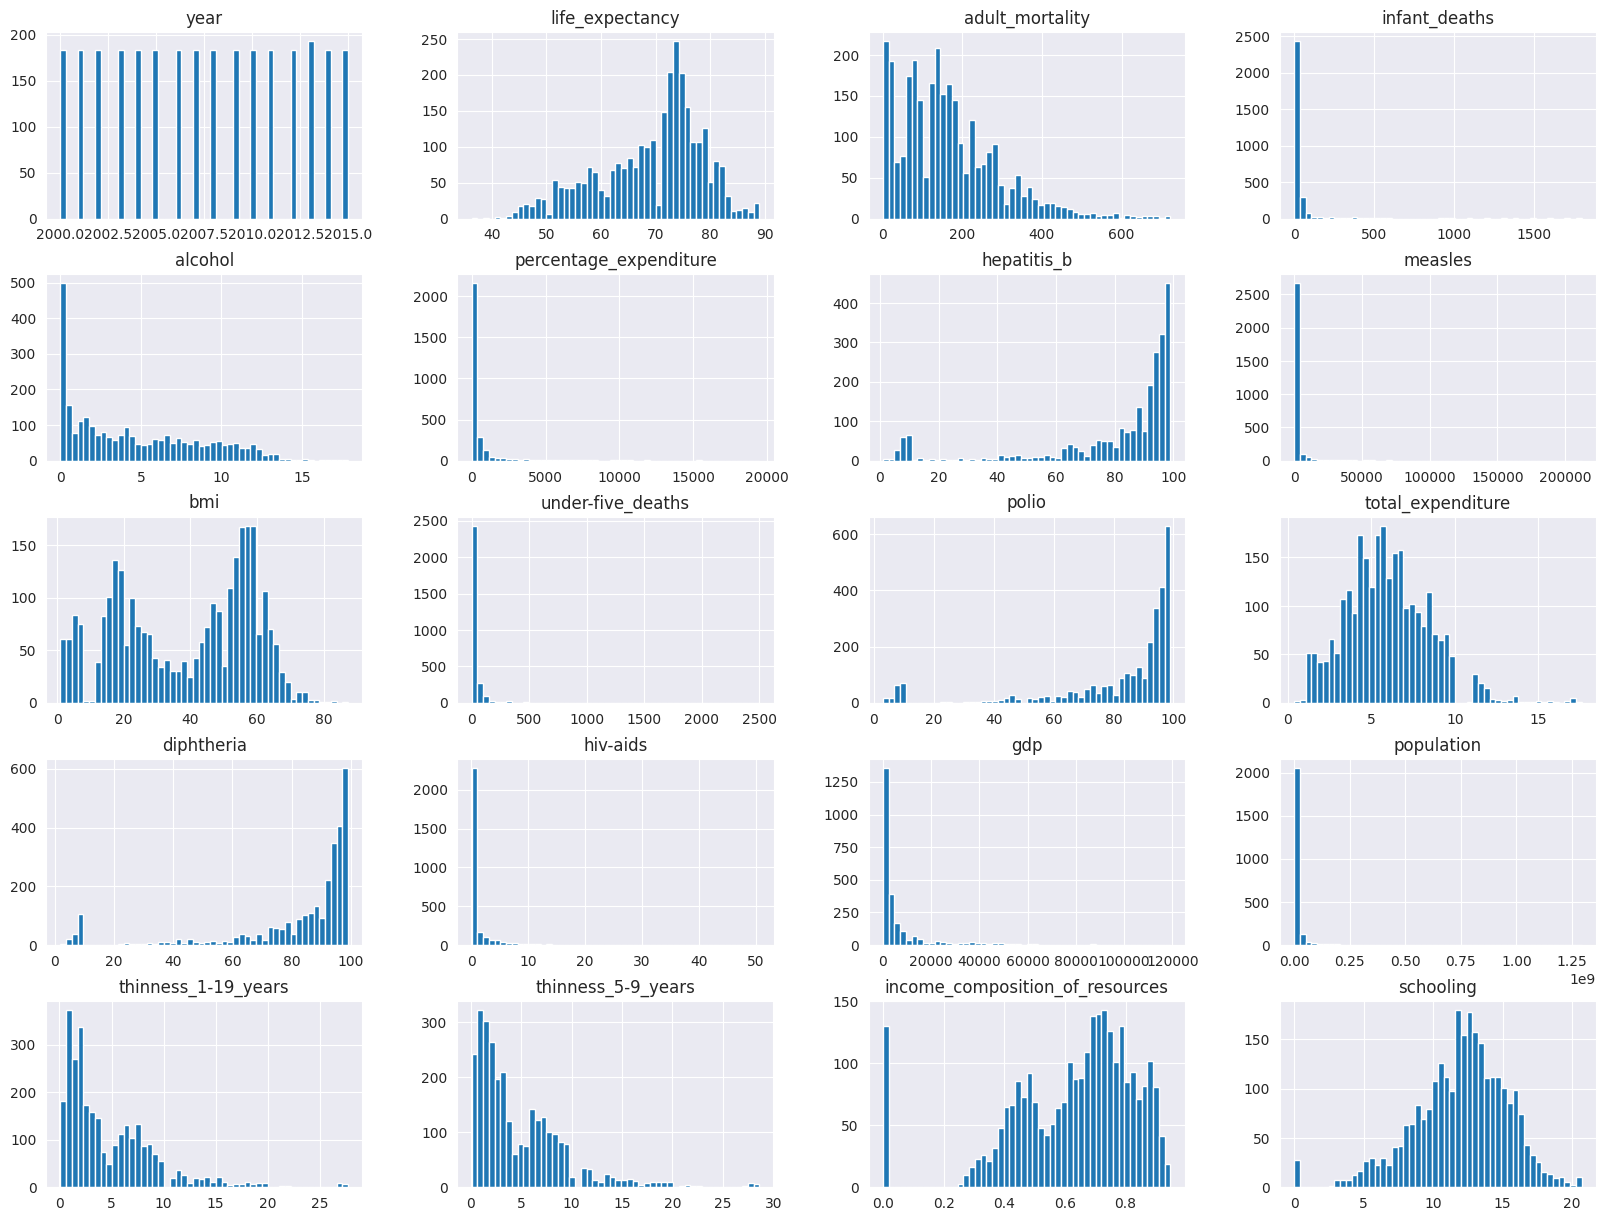

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

With the histograms, we can see that some columns are hard to analyze because they have a really high dispersion. We will need to check for outliers later.

In [11]:
# We have only 20 graphs for 22 columns, so we need to check which columns are missing
qualitative_columns = df.select_dtypes(include=['object']).columns
print(f'Qualitative columns: {qualitative_columns}')

print('Number of unique values for each qualitative column:')
for column in qualitative_columns:
    print(f'- {column}: {df[column].nunique()}')

Qualitative columns: Index(['country', 'status'], dtype='object')
Number of unique values for each qualitative column:
- country: 193
- status: 2


In out dataset, we have only 2 qualitative columns, which are `country` and `status`. We can see that the `country` column has a lot of unique values, so we will need to check for the number of unique values for each country later.

## Bi-variate Analysis

To begin our bi-variate analysis, we will check the correlation between the columns.

In [12]:
# We can only use the correlation matrix with numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

As we can see, some variables are too correlated with each other, so we need to remove one of them to keep our model simple.

Highly correlated columns:
under-five_deaths/infant_deaths: 1.00%
thinness_5-9_years/thinness_1-19_years: 0.94%


<Axes: >

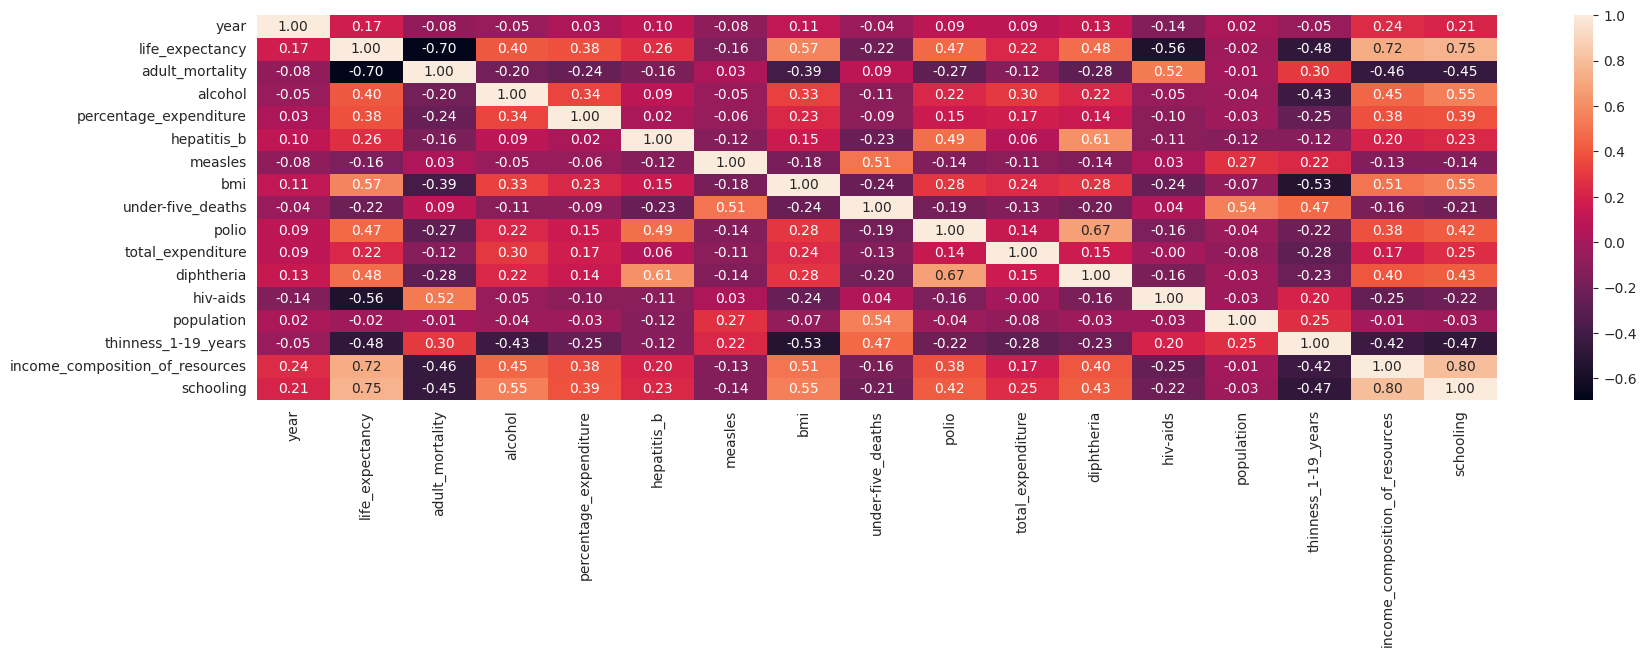

In [13]:
print('Highly correlated columns:')
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i, j] > 0.9) and (i != j):
            print(f'{corr_matrix.columns[i].strip()}/{corr_matrix.columns[j].strip()}: {corr_matrix.iloc[i, j]:.2f}%')
            
# Remove 'infant deaths' because it's really similar to 'under-five deaths'
if 'infant_deaths' in df.columns:
    df = df.drop('infant_deaths', axis=1)
    
# Remove 'thinness 5-9 years' because it's really similar to 'thinness 1-19 years'
if 'thinness_5-9_years' in df.columns:
    df = df.drop('thinness_5-9_years', axis=1)
    
# Remove 'GDP' because it's really similar to 'percentage expenditure' and we saw that GDP has a lot of missing values & outliers
if 'gdp' in df.columns:
    df = df.drop('gdp', axis=1)

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

Thanks to the correlation matrix, we can start to see some correlations between the columns:

- `life_expectancy` has a high correlation with `schooling` and `income_composition_of_resources` and `schooling`
- Some virus immunization columns have a high correlation with each other (like `polio` and `diphtheria`)
- `year` has a low correlation with the other columns
- ...

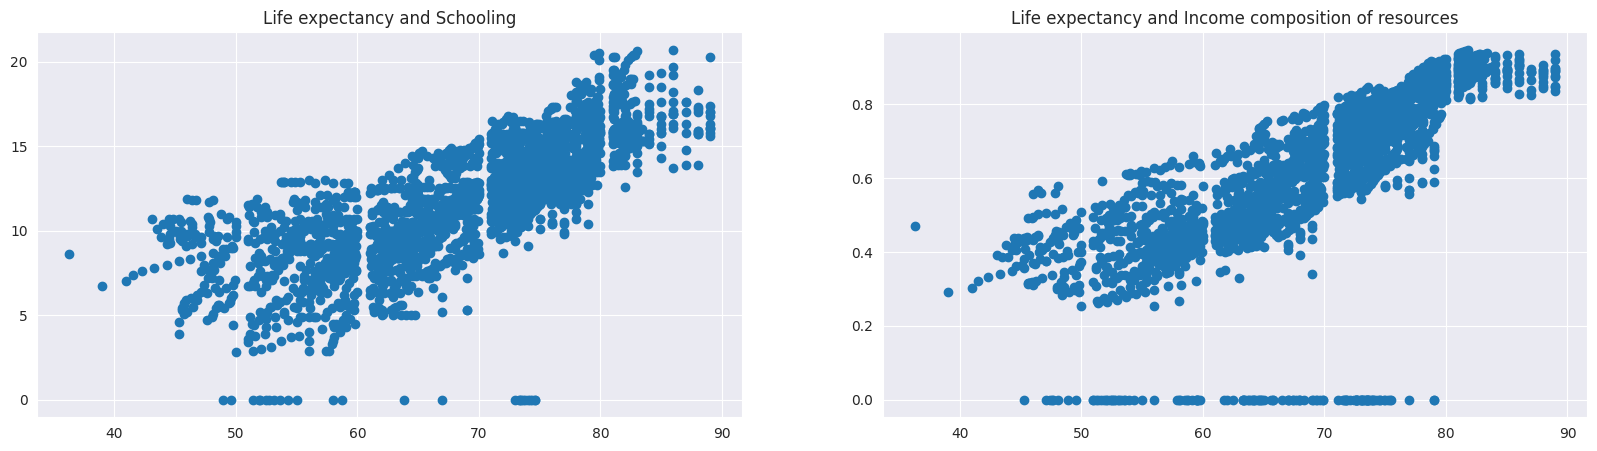

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.scatter(df['life_expectancy'], df['schooling'])
plt.title('Life expectancy and Schooling')

plt.subplot(1, 2, 2)
plt.scatter(df['life_expectancy'], df['income_composition_of_resources'])
plt.title('Life expectancy and Income composition of resources')

plt.show()

Thanks to these scatter plots, we can see that the `life_expectancy` column has a high correlation with the `schooling` and `income_composition_of_resources` columns.

## Cleaning data

### Missing values 

We will use the `interpolate` method to fill the missing values. This method will fill the missing values using different techniques, such as linear, quadratic, and polynomial interpolation.

In our case, we decided to use interpolation because it's a time series dataset, and the values are really close to each other.

In [15]:
columns_with_nulls = df.columns[df.isna().any()].tolist()
for column in columns_with_nulls:
    df[column] = df[column].interpolate()

Now, we can make a quick PCA as it was not working before because of the missing values.

### Multi-variate Analysis

Now, we will use the PCA method to reduce the dimensionality of our dataset. This method will help us to see the most important columns in our dataset.

PCA: Principal Component Analysis, is a method that reduces the dimensionality of the dataset by creating new variables that are linear combinations of the original variables. These new variables are called principal components.

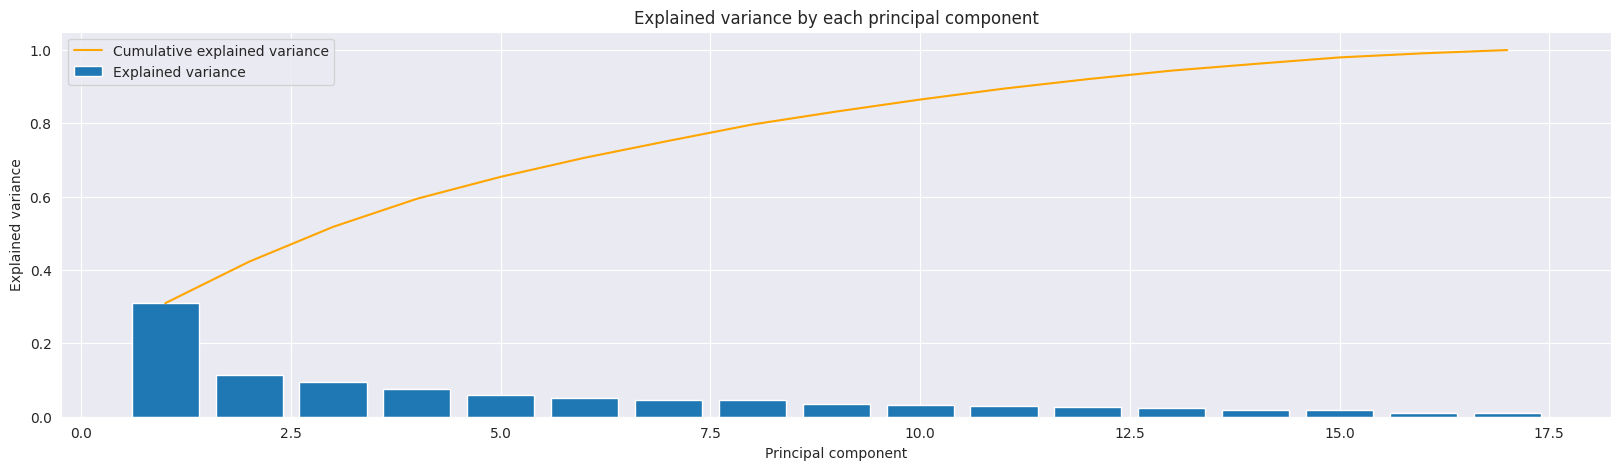

In [16]:
# We need to scale our data before using PCA
numeric_df = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

# We will use the PCA method to reduce the dimensionality of our dataset
pca = PCA()
pca.fit(df_scaled)

# We will use the explained_variance_ratio_ to see the importance of each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()

# We will plot the explained variance by each principal component
plt.figure(figsize=(20,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, label='Explained variance')
plt.plot(range(1, len(explained_variance)+1), explained_variance_cumulative, label='Cumulative explained variance', color='orange')
plt.title('Explained variance by each principal component')
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.legend()
plt.show()

# TODO: Move this to the cleaning data section

With this graph, we can see that the first 10 principal components explain more than 85% of the variance in our dataset.

### Outliers

As we can see, some columns have a really high dispersion, so we need to check for outliers.

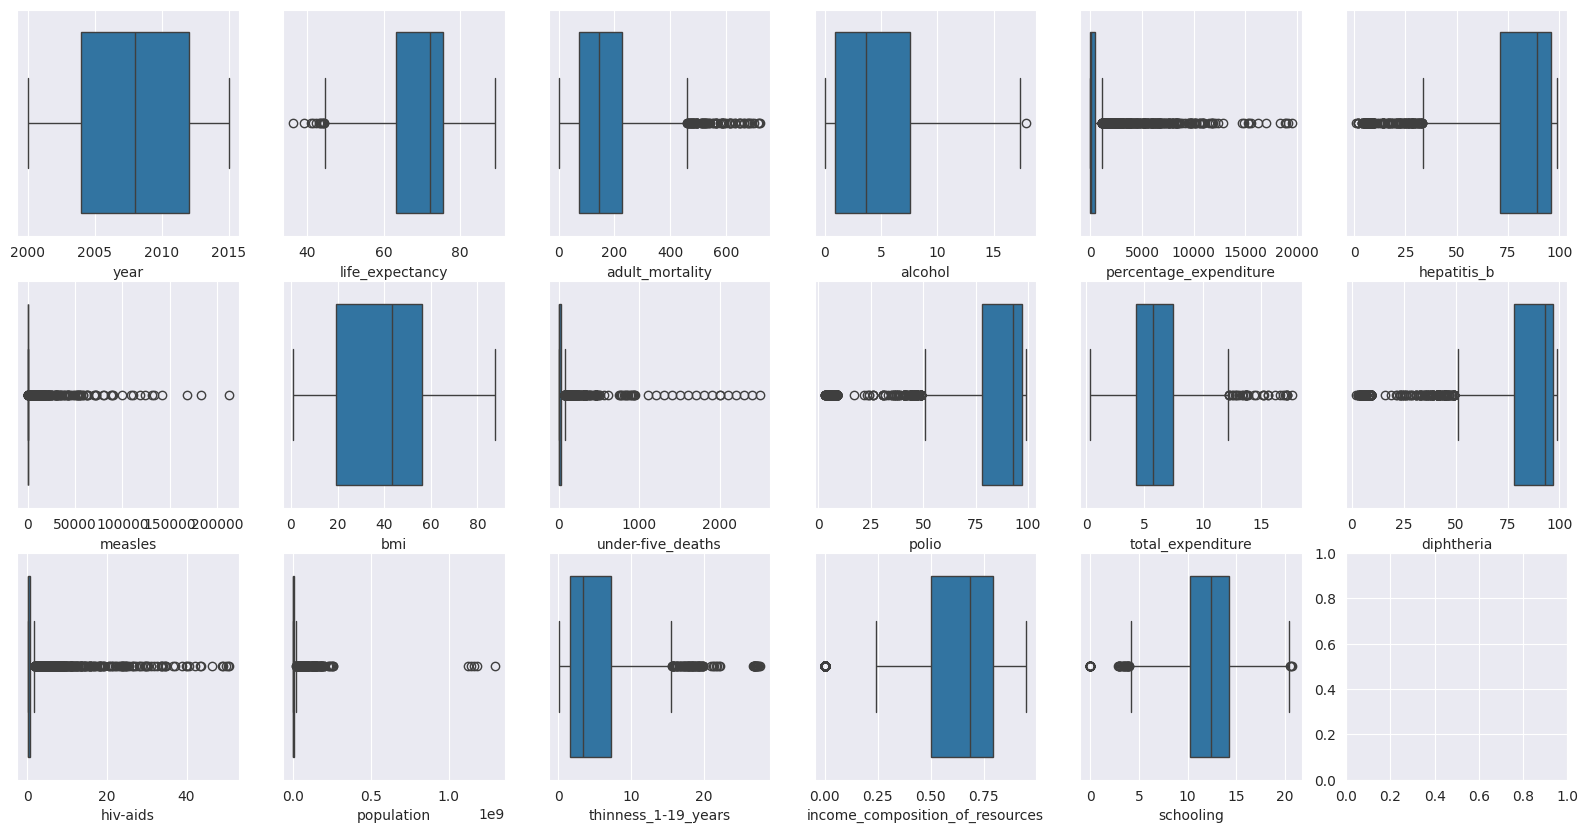

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20,10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(x=df[column], ax=axes[i//6, i%6], orient='h')

In [18]:
def get_outliers(d):
    out = {}
    for c in d.select_dtypes(include=['float64', 'int64']).columns:
        q1 = d[c].quantile(0.25)
        q3 = d[c].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        out[c] = d[(d[c] < lower_bound) | (d[c] > upper_bound)].shape[0]
    return out

In [19]:
outliers = get_outliers(df)
outliers_df = pd.DataFrame(list(outliers.items()), columns=['column', 'number_of_outliers'])
outliers_df.sort_values(by='number_of_outliers', ascending=False)

,column,number_of_outliers
6,measles,542
12,hiv-aids,542
8,under-five_deaths,394
4,percentage_expenditure,389
13,population,364
11,diphtheria,301
9,polio,282
5,hepatitis_b,248
15,income_composition_of_resources,130
14,thinness_1-19_years,89


To reduce the impact of our outliers, we will use the `winsorization` method.

In [20]:
df_winsorized = df.copy()

def winsorize_column(d, c, lower, upper, plot = False):
    df_winsorized[c] = winsorize(df[c], (lower, upper))
    
    if plot:
        plt.figure(figsize=(15,4))
        plt.subplot(1, 2, 1)
        plt.boxplot(d[c])
        plt.subplot(1, 2, 2)
        plt.boxplot(df_winsorized[c])

In [21]:
winsorize_column(df, 'hiv-aids', 0, 0.19)

In [22]:
winsorize_column(df, 'measles', 0, 0.20)

In [23]:
winsorize_column(df, 'under-five_deaths', 0, 0.14)

In [24]:
winsorize_column(df, 'percentage_expenditure', 0, 0.14)

In [25]:
winsorize_column(df, 'population', 0, 0.13)

In [26]:
winsorize_column(df, 'diphtheria', 0.11, 0)

In [27]:
winsorize_column(df, 'polio', 0.1, 0)

In [28]:
winsorize_column(df, 'hepatitis_b', 0.09, 0)

In [29]:
winsorize_column(df, 'income_composition_of_resources', 0.05, 0)

In [30]:
winsorize_column(df, 'thinness_1-19_years', 0, 0.04)

In [31]:
winsorize_column(df, 'adult_mortality', 0, 0.03)

In [32]:
winsorize_column(df, 'schooling', 0.02, 0.01)

In [33]:
winsorize_column(df, 'total_expenditure', 0, 0.02)

In [34]:
winsorize_column(df, 'life_expectancy', 0.01, 0)

In [35]:
winsorize_column(df, 'alcohol', 0, 0.01)

In [36]:
df = df_winsorized

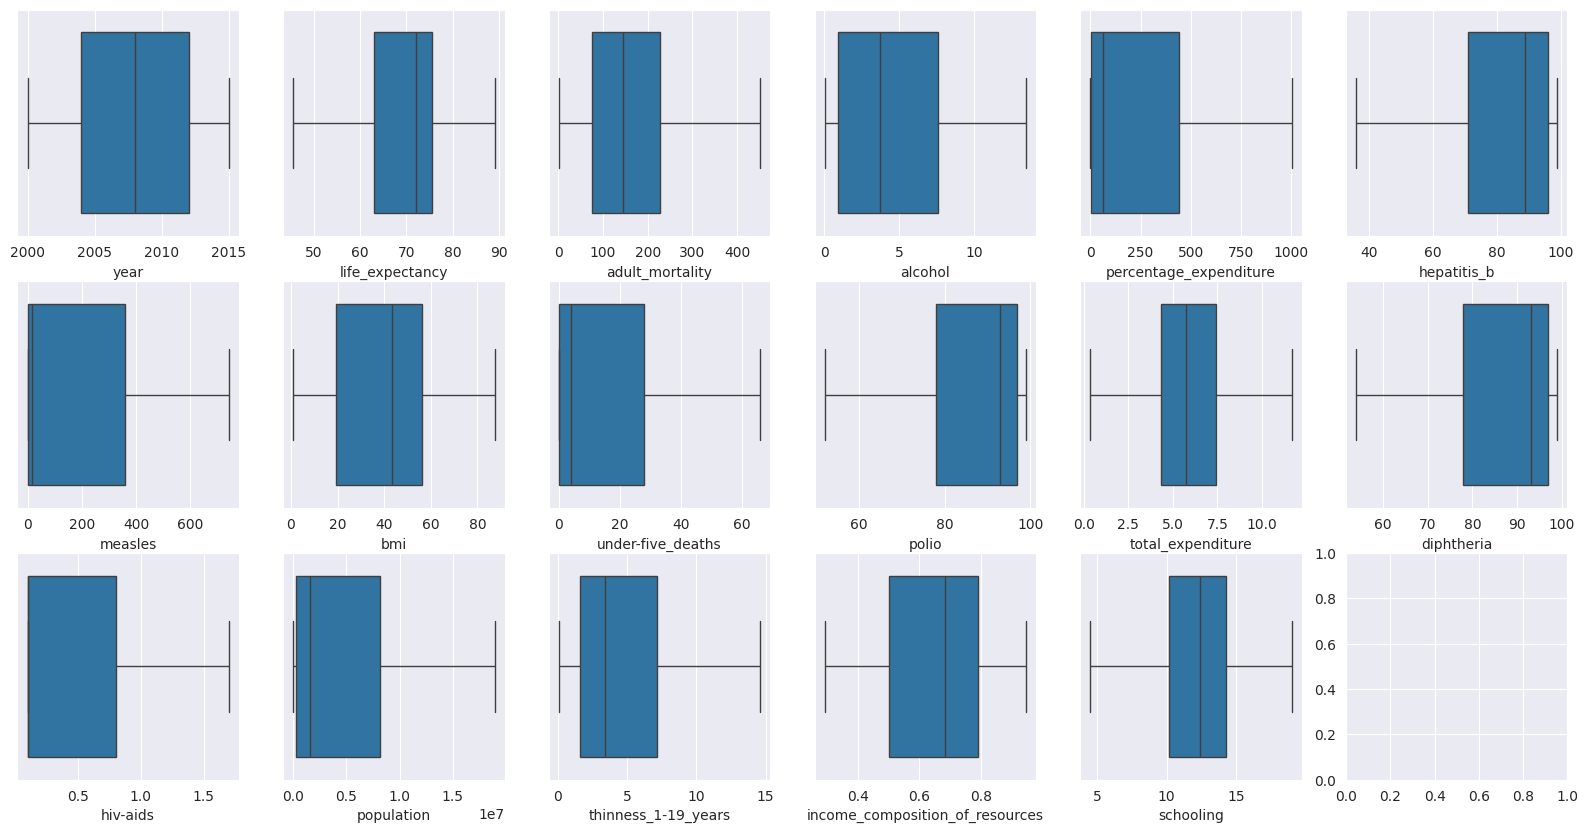

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20,10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(x=df[column], ax=axes[i//6, i%6], orient='h')

## Feature Engineering

### Categorical variables

In [38]:
df.describe(include=['object'])

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


Text(0.5, 1.0, 'Number of tuples for each status')

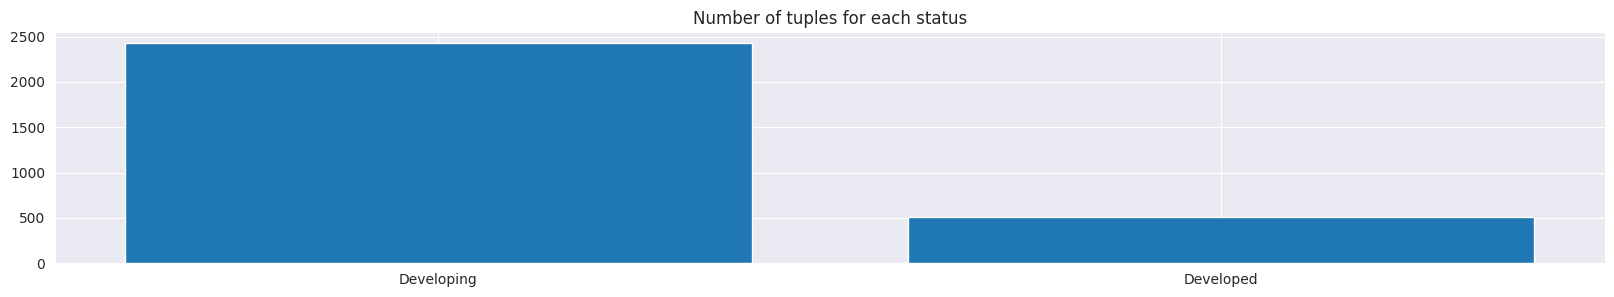

In [39]:
plt.figure(figsize=(20,3))
plt.bar(df['status'].value_counts().index, df['status'].value_counts().values)
plt.title('Number of tuples for each status')

Since this variable has a kind of "weight" (developed countries have a higher life expectancy), we will use the `get_dummies` method to make labels encoding.

In [40]:
df = pd.get_dummies(df, columns=['status'], drop_first=True)

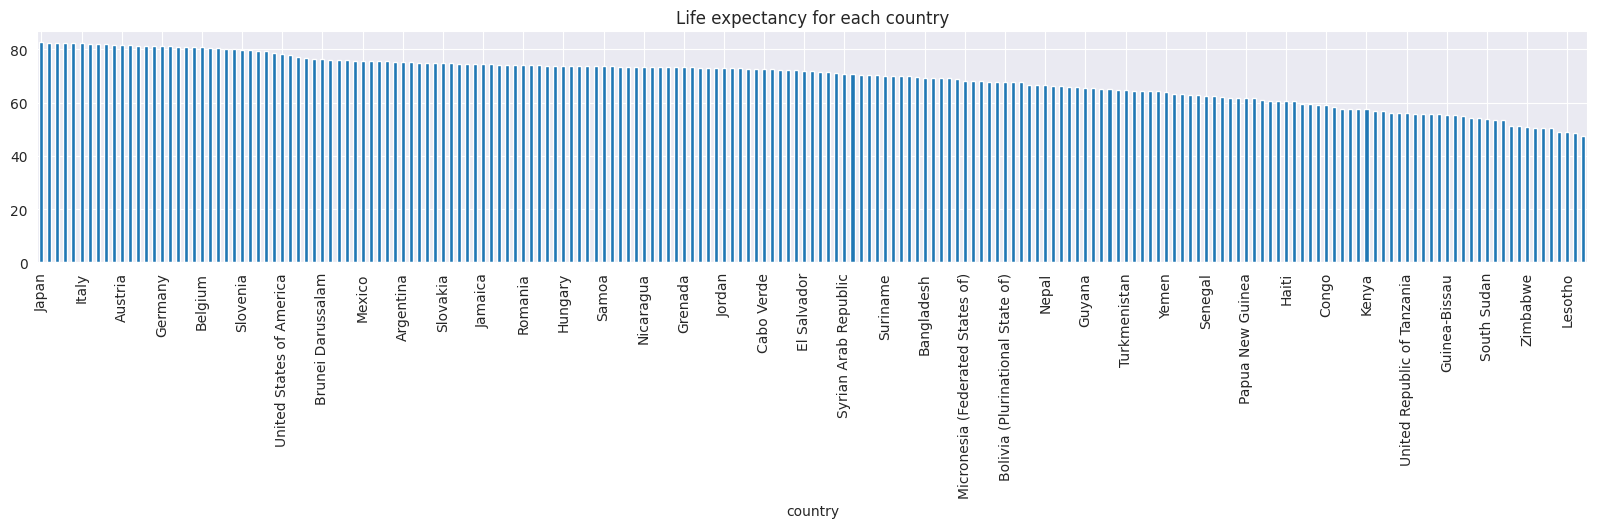

In [41]:
df_country = df.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)
df_country.plot(kind='bar', figsize=(20,3))
plt.title('Life expectancy for each country')
plt.xticks(np.arange(0, len(df_country), step=5), df_country.index[::5], rotation=90)
plt.show()

Now, for the `Country` column, we will use the `HashEncoder` method to make labels encoding. This method will convert the country names into a hash, which will be used as a label. We made this choice because we have a lot of different countries, and using the `get_dummies` method would create a lot of columns, which would make our model more complex.

In [42]:
if 'country' in df.columns:
    encoder = ce.HashingEncoder(cols=['country']).fit(df)
    df = encoder.transform(df)

In [43]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,year,life_expectancy,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv-aids,population,thinness_1-19_years,income_composition_of_resources,schooling,status_Developing
0,0,0,0,0,0,0,0,1,2015,65.0,...,66,52.0,8.16,65.0,0.1,18938762.0,14.605882,0.479,10.1,True
1,0,0,0,0,0,0,0,1,2014,59.9,...,66,58.0,8.18,62.0,0.1,327582.0,14.605882,0.476,10.0,True
2,0,0,0,0,0,0,0,1,2013,59.9,...,66,62.0,8.13,64.0,0.1,18938762.0,14.605882,0.470,9.9,True
3,0,0,0,0,0,0,0,1,2012,59.5,...,66,67.0,8.52,67.0,0.1,3696958.0,14.605882,0.463,9.8,True
4,0,0,0,0,0,0,0,1,2011,59.2,...,66,68.0,7.87,68.0,0.1,2978599.0,14.605882,0.454,9.5,True


## EDAs conclusions

To conclude our EDAs, we can highlight some points:

- We have a lot of columns that are highly correlated with each other, so we need to remove some of them to keep our model simple
- We have some missing values, but we used the `interpolate` method to fill them
- We have some outliers, but we used the `winsorization` method to reduce their impact
- We have some categorical variables, but we used the `get_dummies` and `HashEncoder` methods to make labels encoding

Now, we can move to the next step: the model building.

We want to predict the `life_expectancy` column, so we will use a regression model to do that.

To do that, following our intuition, and with the results of our EDAs, we will use the following columns as features:

- `alcohol`: this feature is a good indicator of the global health of a country (in our opinion)
- `percentage_expenditure`: a country that spends more on health will have a higher life expectancy
- `bmi`: the average Body Mass Index of the entire population is a good indicator of the nutrition of a country
- `schooling`: the average number of years of schooling of a population is a good indicator of the education of a country
- ...

# Linear regression

To properly choose the columns, we observe their correlation with the variable "life_expectancy".

In [44]:
df.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'year', 'life_expectancy', 'adult_mortality', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv-aids', 'population', 'thinness_1-19_years',
       'income_composition_of_resources', 'schooling', 'status_Developing'],
      dtype='object')

In [45]:
correlation = df.corr()['life_expectancy'].sort_values(ascending=False)

print(correlation)

life_expectancy                    1.000000
income_composition_of_resources    0.784959
schooling                          0.726876
diphtheria                         0.579619
polio                              0.570039
bmi                                0.557811
percentage_expenditure             0.489510
alcohol                            0.403885
hepatitis_b                        0.284298
total_expenditure                  0.218593
year                               0.167629
col_3                              0.152137
col_5                              0.083338
col_6                              0.018765
population                         0.006874
col_1                              0.003625
col_2                             -0.042373
col_0                             -0.054975
col_4                             -0.068907
col_7                             -0.094662
measles                           -0.337020
status_Developing                 -0.483814
thinness_1-19_years             

## Choose the right variables
First, we need to select the choosen columns and split the dataset in train and test sets.

In [46]:
X = df[[
    'year', # We keep the year to see if the life expectancy is increasing over time
    # 'adult_mortality', # Makes no sense to keep it
    'alcohol', # We keep this column because it's a good indicator of the global health of a country
    'percentage_expenditure', # We keep this column because a country that spends more on health will have a higher life expectancy
    'hepatitis_b', # We keep this column because it's a good indicator of the global health of a country
    'measles', # ...
    'bmi',
    'under-five_deaths',
    'polio',
    'total_expenditure',
    'diphtheria',
    'hiv-aids',
    'population',
    'thinness_1-19_years',
    'income_composition_of_resources',
    'schooling',
    'status_Developing'
]]

y = df['life_expectancy']

Now, we are working on training and testing sets, normalizing the data, fitting the model, and making predictions.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# We use a random state to make sure that we will always get the same results

Then, we need to normalize the data to make sure that they hold the same weight in the linear regression.

In [48]:
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=X_train.columns) # For shape purpose 
X_test_sh=X_test

After that, we fitted our data to our model.

In [49]:
linear_model = LinearRegression()
linear_model.fit(X_train_normalized, y_train)

LinearRegression()

Now we can predict the life expectancy. Here's a scatter plot to compare our prediction with the actual values.

In [50]:
y_pred = linear_model.predict(X_test_normalized)

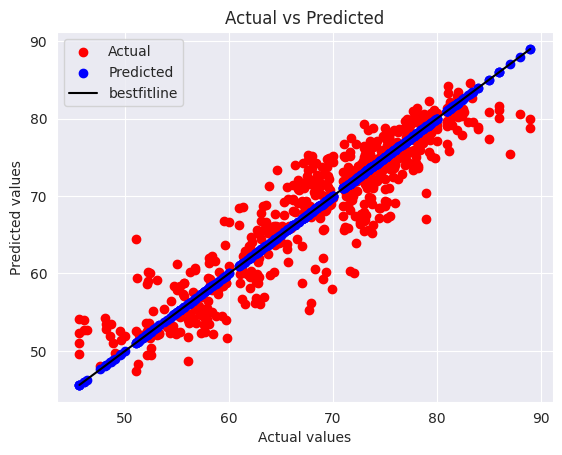

In [51]:
plt.scatter(y_test, y_pred, c='red', label='Actual')
plt.scatter(y_test, y_test, c='blue', label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-', label='bestfitline')
plt.legend()

## Evaluate the model
After that we can evaluate our model using the r² error, mean squared error, the root mean squared error and the mean absolute error.

- r²: represents the value of how much the independent variables are able to describe the value for the response/target variable
- mean squared error: the average of the squares of the errors
- root mean squared error: the square root of the mean of the squared errors
- mean absolute error: the average of the absolute errors 

In [52]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Coefficient de détermination (R²) :", r2)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("Mean Absolute Error (MAE) :", mae)


Coefficient de détermination (R²) : 0.845396875028535
Mean Squared Error (MSE) : 13.342589960906306
Root Mean Squared Error (RMSE) : 3.6527510127171694
Mean Absolute Error (MAE) : 2.730989470946354


The r² score is close to 1 meaning that the model is working pretty. The mean squared error, the root mean squared error and the mean absolute error are also quite low which means that the model is working well.

## Display the features' coefficients

Now, we will display the coefficients of the features to see which one has the most impact on the life expectancy.

While we did our linear regression, those coefficients were calculated to minimize the error between the predicted values and the actual values.

In [53]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
print(coefficients)

                            Feature  Coefficient
0                              year     0.501166
1                           alcohol    -0.212049
2            percentage_expenditure     0.741322
3                       hepatitis_b    -0.588639
4                           measles    -0.125084
5                               bmi     0.069162
6                 under-five_deaths    -1.457522
7                             polio     0.259904
8                 total_expenditure     0.277043
9                        diphtheria     0.910111
10                         hiv-aids    -4.245682
11                       population     0.389246
12              thinness_1-19_years    -0.445722
13  income_composition_of_resources     2.953892
14                        schooling    -0.396205
15                status_Developing    -0.859689


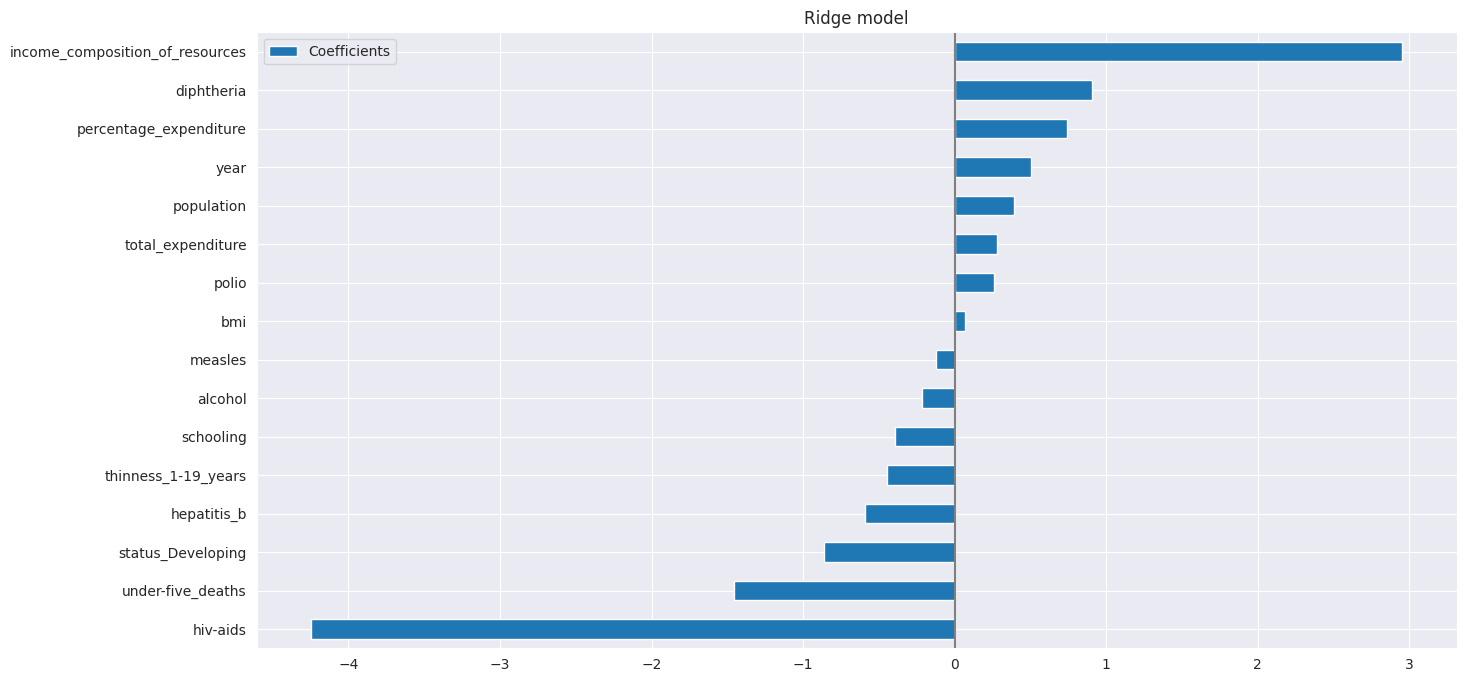

In [54]:
features_coefficients = pd.DataFrame(linear_model.coef_, columns=["Coefficients"], index=X.columns).sort_values(by="Coefficients")

features_coefficients.plot(kind="barh", figsize=(20, 8))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

With the coefficients, wee observe that the variables with the most impact are "hiv/aids"  and  "income composition of resource".

Positive coefficients indicate that the feature has a positive impact on the life expectancy, while negative coefficients indicate that the feature has a negative impact on the life expectancy.

**Positive features:**
- `income_composition_of_resources`: The Human Development
- `diphtheria`: The more the country is vaccinated, the higher the life expectancy
- `year`: Life expectancy is increasing over time ?
- ...

**Negative features:**
- `hiv-aids`: Logic, the more HIV/AIDS, the lower the life expectancy
- `under-five_deaths`: The more under-five deaths, the lower the life expectancy
- `status_Developing`: The more the country is developing, the lower the life expectancy
- ...

# More complex model

## 1st try - Decision Tree

To begin, we will use a decision tree to predict the life expectancy. We will use the `GridSearchCV` method to find the best hyperparameters for our model.

**Decision Tree** is a type of supervised learning algorithm that is mostly used for classification problems. It works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on the most significant attribute that differentiates the classes/labels.

Best Hyper Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 12}
Lowest Mean Square Error: 9.670253882699473
On average the model is off by 3.110 years.


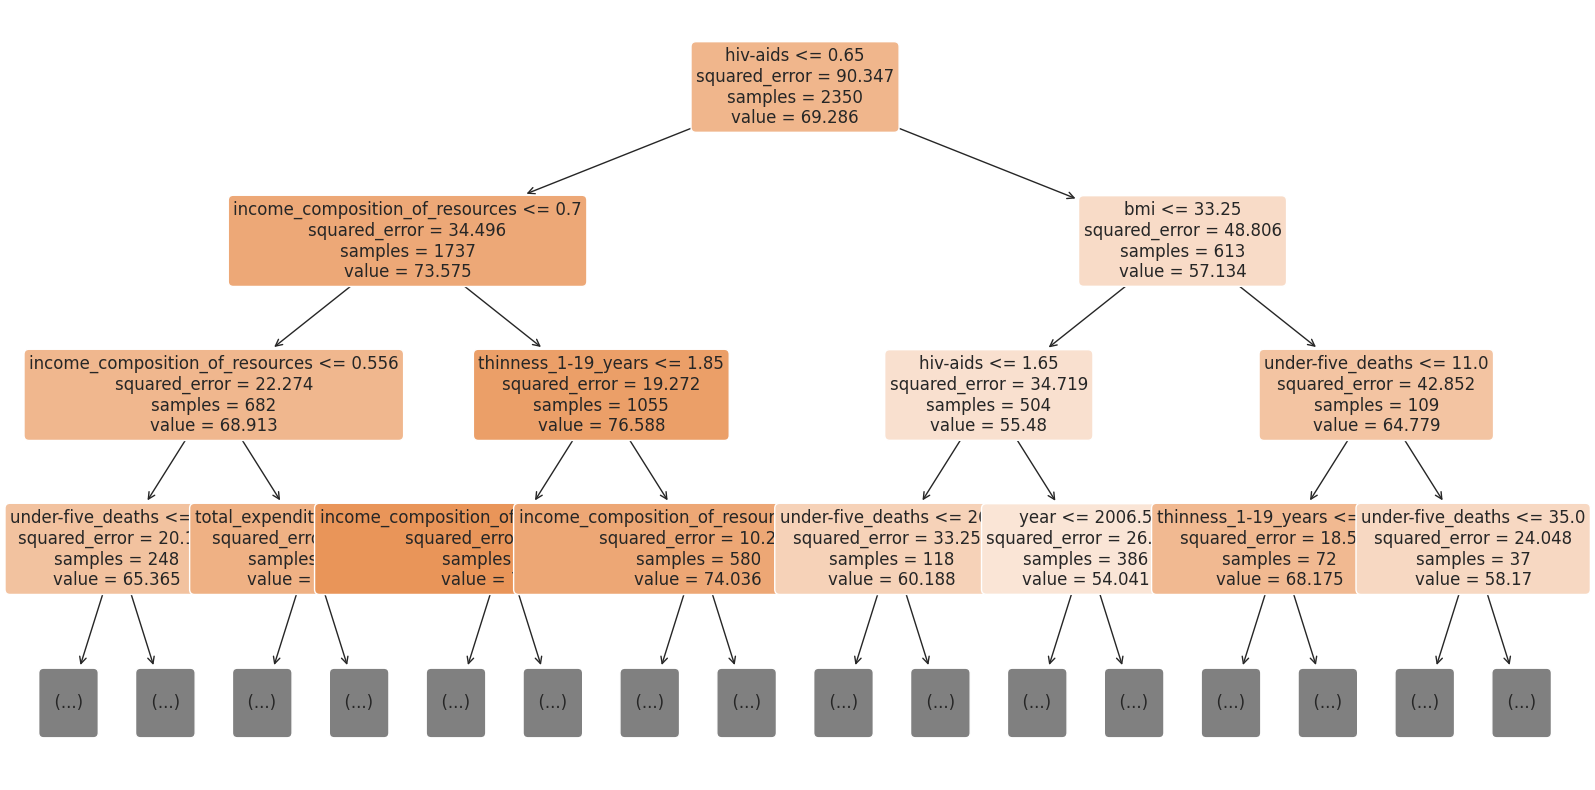

In [55]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
import math

# We will keep same X and y as before
# X = df.drop('life_expectancy', axis=1)  
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Let's define some `HyperParameters` we want to test ! 
param_grid = {
    'max_depth': [3, 7, 10, 12, 15, 20, 30],
    'min_samples_split': [2, 3, 5, 12, 20],
    'min_samples_leaf': [1, 3, 5, 8, 10]
}

dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyper Parameters:", grid_search.best_params_)
print("Lowest Mean Square Error:", -grid_search.best_score_)
print(f"On average the model is off by {math.sqrt(-grid_search.best_score_):.3f} years.")


best_model = grid_search.best_estimator_

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, rounded=True, feature_names=X.columns, max_depth=3, fontsize=12)
plt.show()

The results are better than the ones we got with linear regression. But we would still like to improve our model.

We would like to understand which parameters impact our decision tree the most.

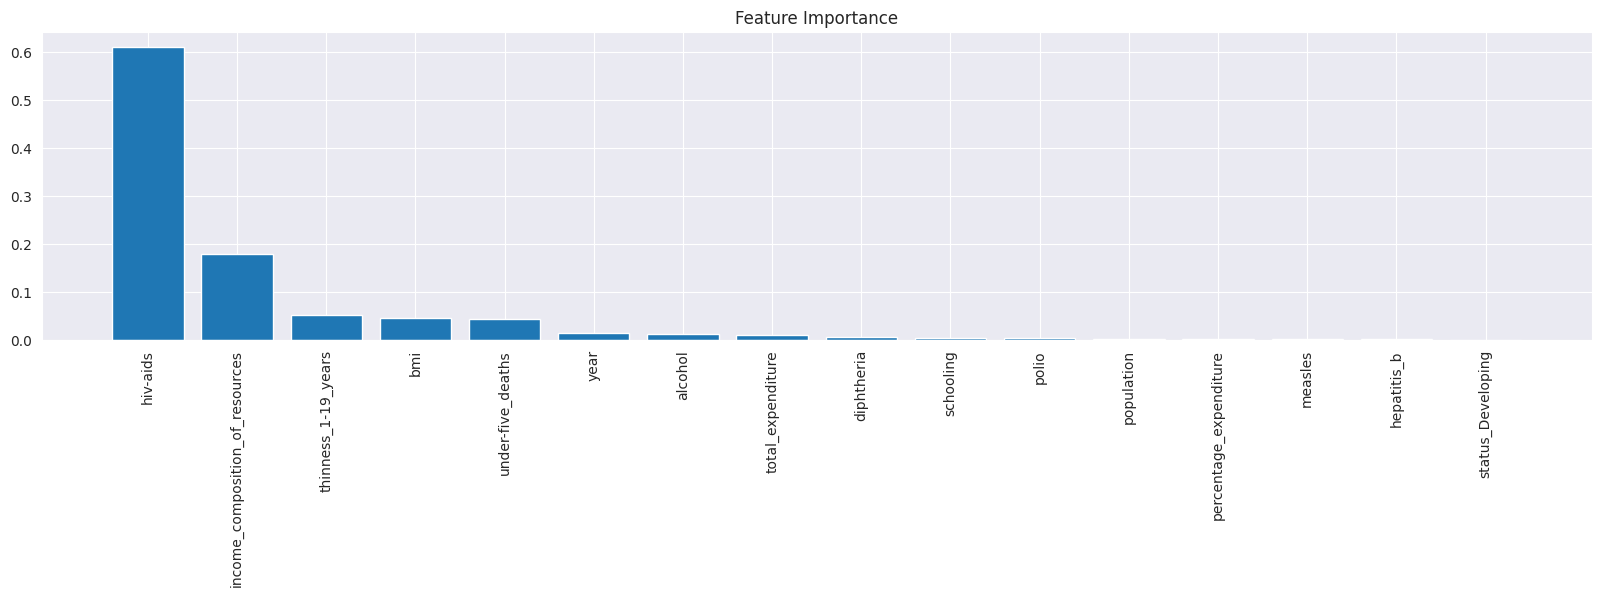

In [56]:
feature_importance = best_model.feature_importances_

features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features = features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20,4))
plt.title('Feature Importance')
plt.bar(features['Feature'], features['Importance'])
plt.xticks(rotation='vertical')
plt.show()

It seems like our model considers HIV to have a High importance on life expectancy, this is consistent with our previous findings.

### Let's try to improve our model's performance with cross validation & Gradient boosting.

Gradient Boosting is a method that allows us to construct a stronger model from several smaller and less powerful models.
The Cross Validation will create k subsets and train a model for each combination of k-1 subsets, then test itself on the remaining subset.

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(random_state=42)
cv_scores = cross_val_score(gbr, X_train, y_train, cv=7, scoring='neg_mean_squared_error')

mean_cv_score = -np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean MSE score using cross validation : {mean_cv_score:.3f} (+/- {std_cv_score:.3f})")


gbr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = gbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print(f"MSE score on the test set: {test_mse:.3f}")
print(f"On average the model is off by {test_rmse:.3f} years (RMSE).")

Mean MSE score using cross validation : 8.789 (+/- 1.071)
MSE score on the test set: 6.977
On average the model is off by 2.641 years (RMSE).


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
}

# This code is really long to run, so we will comment it
# gbr = GradientBoostingRegressor(random_state=42)
# grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# we get the best model
best_parameters = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 300}
print(f"Best parameters: {best_parameters}")

best_model = GradientBoostingRegressor(**best_parameters, random_state=42)
best_model.fit(X_train, y_train)

# We cross validate that model to check it for over-fitting
cv_scores = cross_val_score(best_model, X_train, y_train, cv=7, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 300}


Mean MSE score using cross-validation: 5.226 (± 0.630)
MSE on the test set: 4.089
On average, the best model is off by 2.022 years.
Coefficient(R²) : 0.9526245027245588


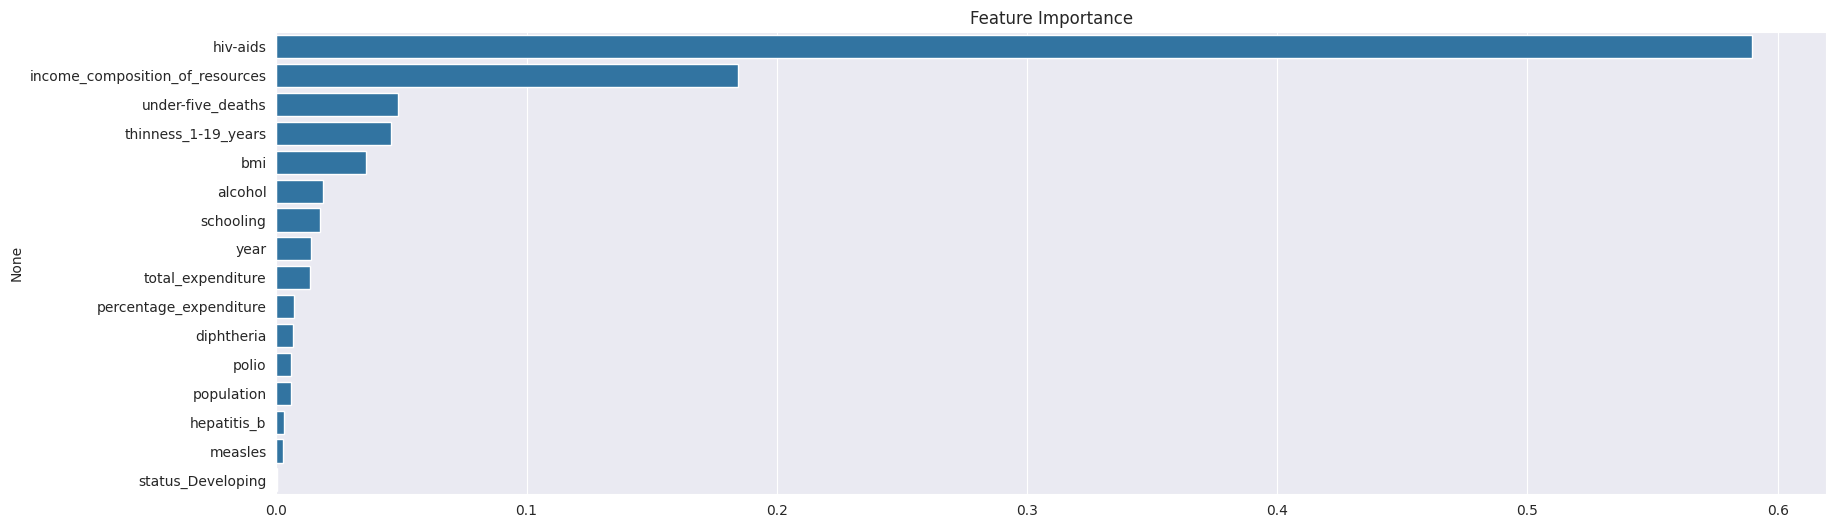

In [59]:
print(f"Mean MSE score using cross-validation: {mean_cv_score:.3f} (± {std_cv_score:.3f})")
print(f"MSE on the test set: {test_mse:.3f}")
print(f"On average, the best model is off by {test_rmse:.3f} years.")
print("Coefficient(R²) :", r2_score(y_test, y_pred))

plt.figure(figsize=(20, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx])
plt.title("Feature Importance")
plt.show()

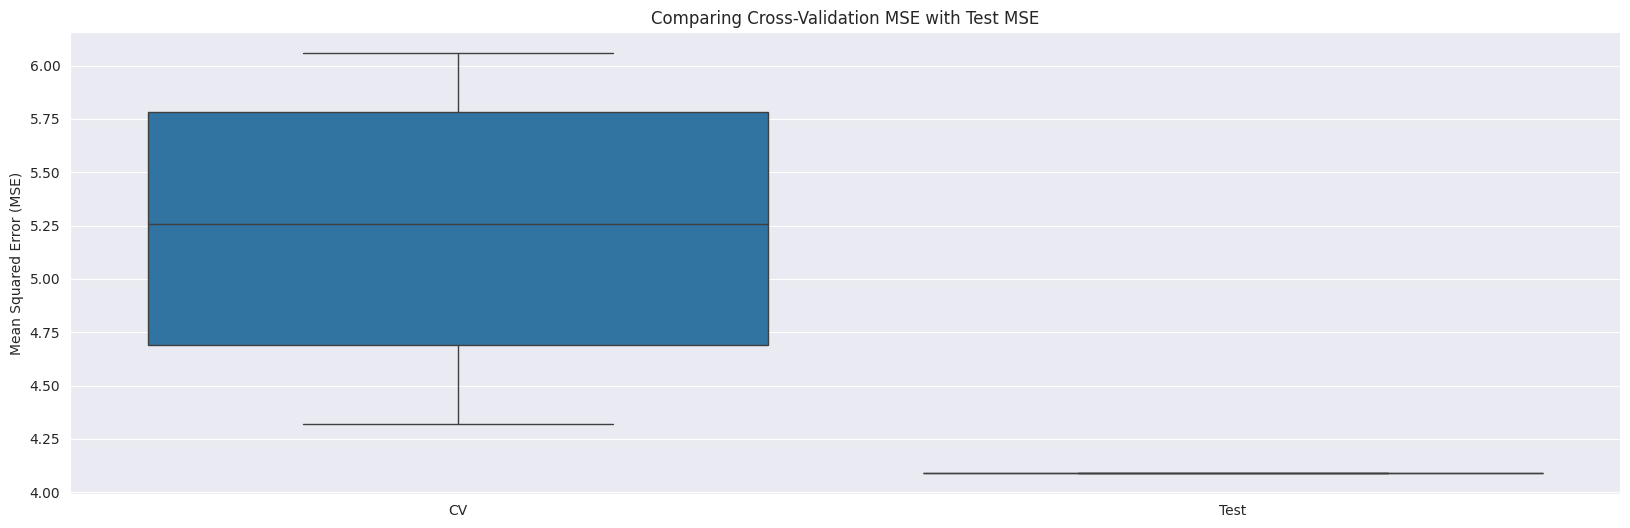

In [60]:
positive_cv_scores = -cv_scores
combined_scores = np.append(positive_cv_scores, np.array([test_mse] * len(positive_cv_scores)))
labels = ['CV'] * len(positive_cv_scores) + ['Test'] * len(positive_cv_scores)
plt.figure(figsize=(20, 6))
sns.boxplot(x=labels, y=combined_scores)
plt.title('Comparing Cross-Validation MSE with Test MSE')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

## Results

Our final models demonstrate strong predictive capabilities, significantly surpassing the performance of our basic linear regression algorithm. Contrary to our initial concerns, the best model does not appear to be overfitted. This is evidenced by the lower Mean Squared Error (MSE) on the test set compared to the mean MSE from cross-validation. The test MSE being lower than the cross-validation MSE suggests that the model is generalizing well to unseen data.

The best model predicts life expectancy with an average error of approximately 2 years, which indicates a high level of precision for this type of prediction task. The selection of hyperparameters `{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 300}` seems to provide a well-tuned model that balances bias and variance effectively.

## Use Cases :

- **Resource Allocation:** Governments and health organizations can use the model to identify regions with lower life expectancy and allocate resources such as funding, medical facilities, and personnel more effectively.

- **Impact Assessment:** NGOs can assess the impact of their health initiatives by predicting changes in life expectancy over time.

# Shapley value to explain our model

First install shap if not, we will use it to explain our model


In [61]:
import shap
shap.initjs()

In [62]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

This plot represents a single prediction's explanation. Each feature's contribution to pushing the model output from the base value (the average model output over the dataset) to the actual model output is shown. Features pushing the prediction higher are shown in red, and those pushing it lower are in blue. For instance, high `income_composition_of_resources` increases the life expectancy prediction, while high `HIV/AIDS` decreases it.

In [63]:
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_test.iloc[:100,:])


It illustrates the SHAP values for 100 predictions. The x-axis is the output value (life expectancy), and each line represents an individual prediction's SHAP values. The plot's color density suggests the distribution of effects across the 100 samples. Red areas show features that generally increase life expectancy predictions, while blue areas show features that decrease it.

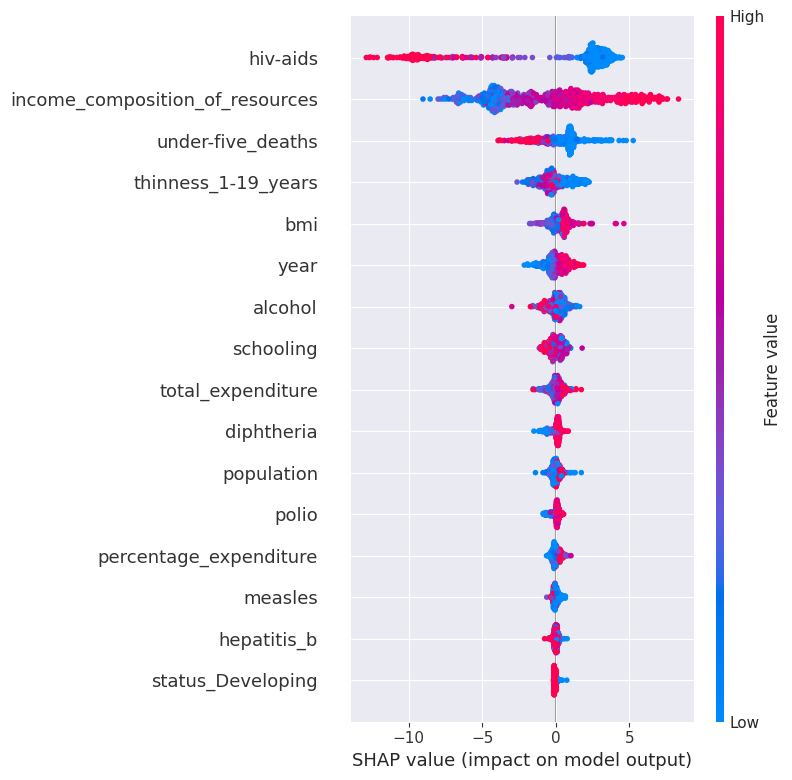

In [64]:
shap.summary_plot(shap_values, X_test)

The features are listed in order of importance from top to bottom. The SHAP value shows the direction and magnitude of a feature's effect on the model prediction. Here is a explication of the features :
- `HIV/AIDS`: This feature has a high negative impact on life expectancy. Higher values of HIV/AIDS (shown in red) lead to a lower life expectancy prediction--.
- `Income Composition of Resources`: This feature has a positive impact on life expectancy. Higher values are associated with higher life expectancy.
- `Thinness 1-19 years`: Higher rates of thinness among 1-19 years olds indicate a negative impact on life expectancy blue.
- `Alcohol`: Higher alcohol consumption is associated with a negative impact on life expectancy, but the impact is less pronounced than the previous features

Now, we can analyse some individual dependence plots to see the impact of each feature on the model output.

**Dependence plot:** This plot shows the effect of a single feature across the whole dataset. Each point on the x-axis represents a different sample, and the y-axis represents the SHAP value for that feature. The color of each point represents the value of the feature.

In [65]:
# for feature in X_test.columns:
#    shap.dependence_plot(feature, shap_values, X_test)

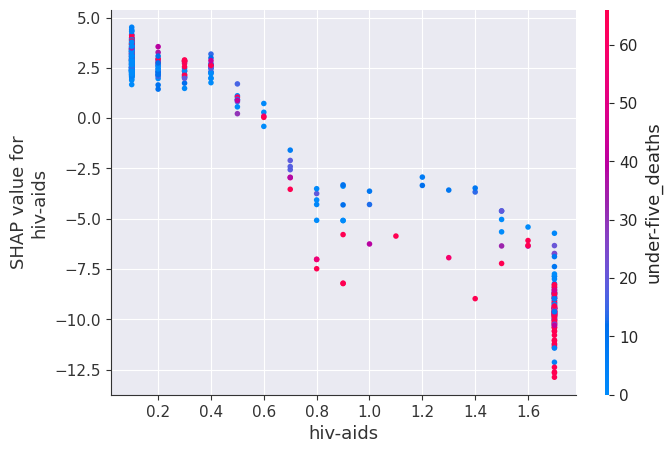

In [66]:
shap.dependence_plot("hiv-aids", shap_values=shap_values, features=X_test)
# As we can see, the higher the `HIV/AIDS` rate, the lower the life expectancy prediction. This is consistent with our previous findings.

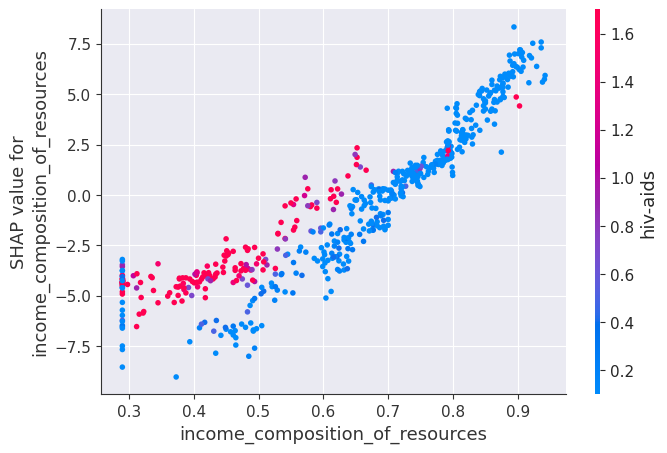

In [67]:
shap.dependence_plot("income_composition_of_resources", shap_values=shap_values, features=X_test)
# The higher the `Income Composition of Resources`, the higher the life expectancy prediction. This is consistent with our previous findings.

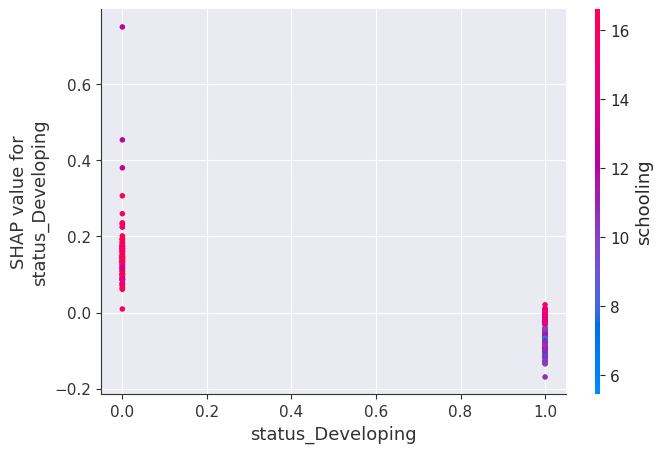

In [68]:
shap.dependence_plot("status_Developing", shap_values=shap_values, features=X_test)
# The `Developing` status has a negative impact on life expectancy. This is consistent with our previous findings.

Here are all the important features:

In [69]:
feature_importance = best_model.feature_importances_
importance = pd.Series(feature_importance, index=X_train.columns)
sorted_importance = importance.sort_values(ascending=False)

print(sorted_importance.head(5))

hiv-aids                           0.589929
income_composition_of_resources    0.184609
under-five_deaths                  0.048636
thinness_1-19_years                0.045794
bmi                                0.035967
dtype: float64


As we can see the 3 more important features are:
- `HIV/AIDS`: This feature is far more important than the others (STRANGE ?)
- `Income Composition of Resources`: This feature is the second most important
- `Under Five Deaths`/`Thinness 1-19 years`: These features are the third most important

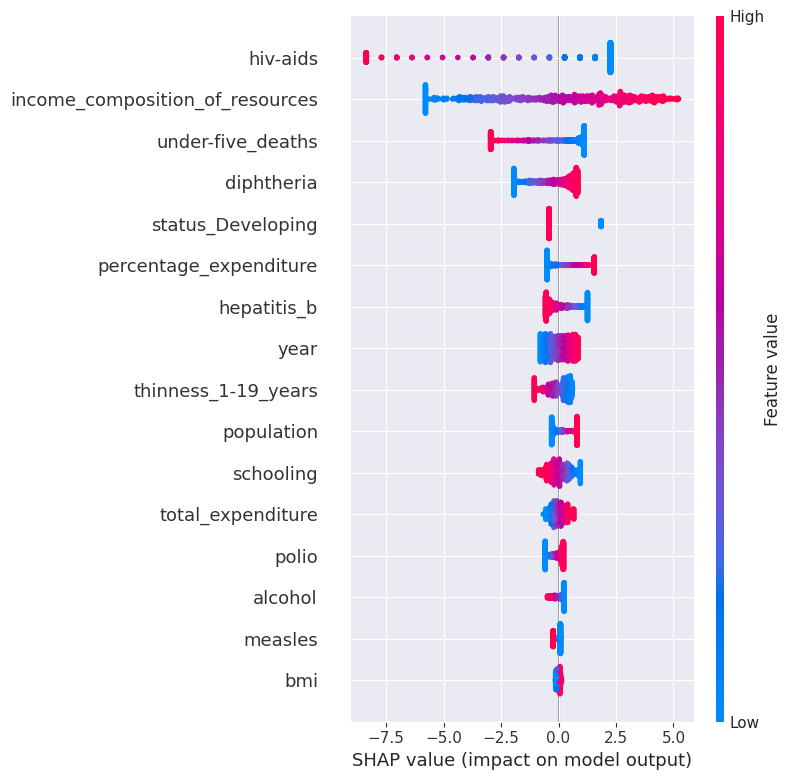

In [70]:
explainer_linear = shap.Explainer(linear_model, X_train_normalized_df)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=X_test_sh.columns)

shap_values_linear = explainer_linear(X_test_normalized_df)
shap.summary_plot(shap_values_linear, X_test_normalized_df)

Let focus on the 3 more importante features : 

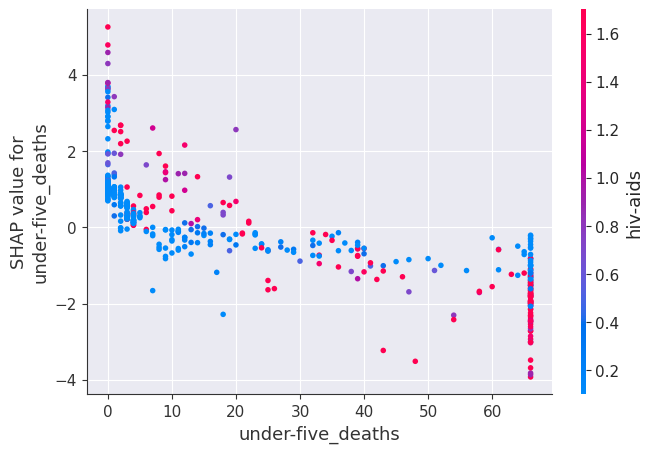

In [71]:
# We already saw the impact of the HIV/AIDS and the Income Composition of Resources
# shap.dependence_plot('hiv-aids', shap_values, X_test)
# shap.dependence_plot('income_composition_of_resources', shap_values, X_test)

shap.dependence_plot('under-five_deaths', shap_values, X_test)

These plots highlight the individual effect of each feature on the model output and also suggest potential interactions between features. For example, **high adult mortality** (we removed it from the model) appears to decrease life expectancy predictions, and this effect is exacerbated by higher rates of HIV/AIDS. Conversely, higher income composition of resources appears to increase life expectancy predictions, but this positive effect can be somewhat offset by high adult mortality rates.

# Clustering of shapley values

To cluster the shapley values, we will reduce the dimension of our data for visualisation purposes. We will do a PCA with the shapley values and visualise the 2 principal axis.

Thanks to PCA, we will be able to see if there are some clusters in our shapley values:

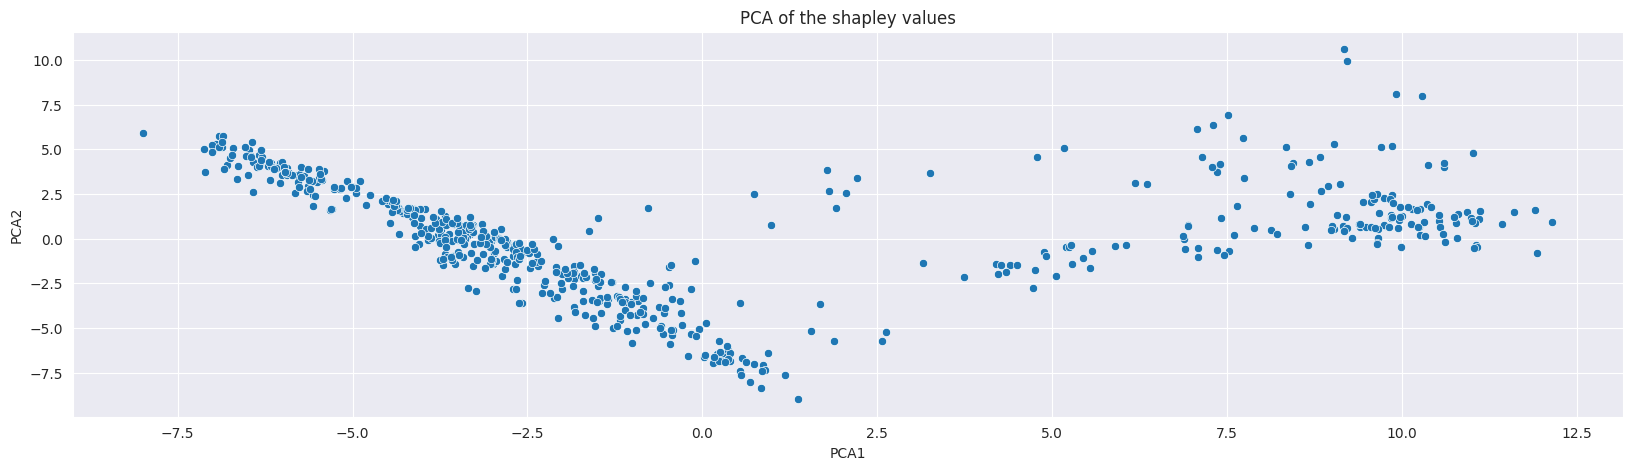

In [72]:
shap_pca = PCA(n_components=2)
shap_pca_values = shap_pca.fit_transform(shap_values)
shap_pca_df = pd.DataFrame(shap_pca_values, columns=['PCA1', 'PCA2'])

# PLOT THE PCA
plt.figure(figsize=(20, 5))
sns.scatterplot(x=shap_pca_df['PCA1'], y=shap_pca_df['PCA2'])
plt.title('PCA of the shapley values')
plt.show()

Thanks to the graph above, we can see 2 main clusters. We will have to choose one of those clustering algorithms to see if we can find some clusters in our shapley values.

- **K-Means:** This algorithm will try to find the best centroids for our clusters
- **DBSCAN:** This algorithm will try to find the best clusters for our data
- **Gaussian Mixture:** This algorithm will try to find the best Gaussian distribution for our data

In our case, we will use the K-Means algorithm to find the best centroids for our clusters since we can see 2 main clusters in our PCA.

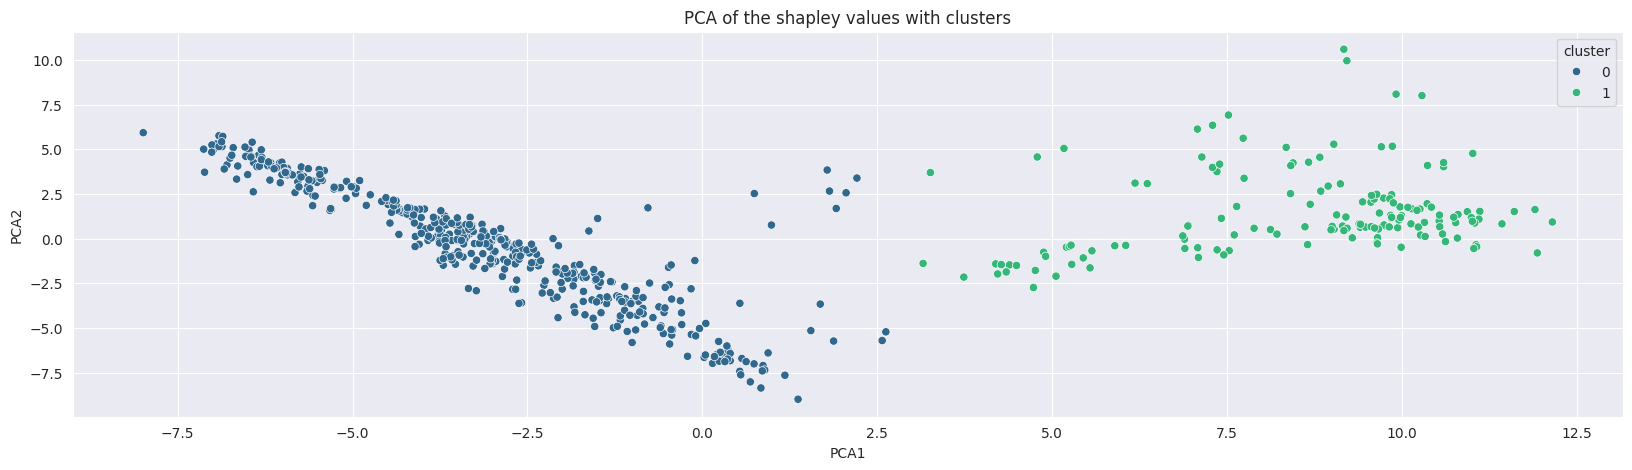

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(shap_values)

shap_pca_df['cluster'] = kmeans.labels_

plt.figure(figsize=(20, 5))
sns.scatterplot(x=shap_pca_df['PCA1'], y=shap_pca_df['PCA2'], hue=shap_pca_df['cluster'], palette='viridis')
plt.title('PCA of the shapley values with clusters')
plt.show()

**Characteristics of each cluster:**

- Cluster 0 (BLUE): This cluster has a lot of negative shapley values and is following a Gaussian distribution
- Cluster 1 (GREEN): This cluster has a lot of positive shapley values and is following a Gaussian distribution

**CONCLUSION:**

Thanks to the clustering of the shapley values, we can see that our model is working well. We can see 2 main clusters in our PCA, and we can see that the shapley values are following a Gaussian distribution in each cluster.